In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 解决坐标轴负刻度乱码问题
plt.rcParams['axes.unicode_minus'] = False
# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['Simhei']

# 设置图片大小，单位英寸
plt.rc('figure', figsize=(8, 4))

### 线图

In [4]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2018', periods=1000))
ts.head()

2018-01-01    0.020858
2018-01-02    0.325509
2018-01-03   -0.288731
2018-01-04   -0.795995
2018-01-05    0.862317
Freq: D, dtype: float64

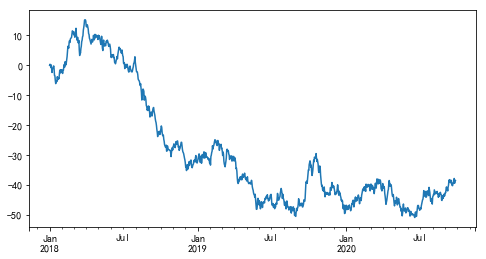

In [5]:
ts = ts.cumsum()  # 将数据累积起来
plt.figure(figsize=(8, 4))
ts.plot()
plt.show()

In [6]:
df = pd.DataFrame(np.random.randn(100, 4).cumsum(0), columns=list('ABCD'), index=np.arange(0, 100, 1))
df.head()

,A,B,C,D
0,1.159782,1.299675,0.065160,1.042842
1,2.397196,0.381554,-0.550695,1.795154
2,1.608267,-1.085253,-0.513442,2.267286
3,1.631355,-1.910105,-0.379165,0.956123
4,-0.265106,-1.587559,-1.318741,2.095117


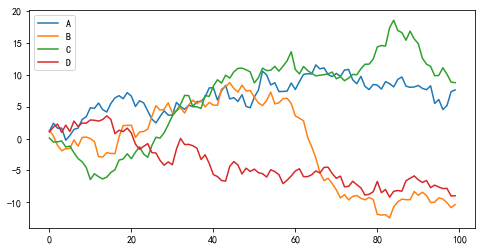

In [7]:
df.plot()
plt.show()

In [7]:
# ts.plot?

### 直方图

In [10]:
np.random.seed(2017)
s = pd.Series(np.random.randn(1000))
s.plot(kind='hist', figsize=(5, 3), ylim=[0, 300])
s.plot.hist(figsize=(8, 5), bins=20)
plt.show()

### 饼图

In [90]:
s = pd.Series(np.random.randint(70, size=5), index=['CN', 'US', 'UK', 'IN', 'CA'])
plt.figure(figsize=(3, 3))  # 饼是圆的
s.plot.pie(label='')
plt.show()

In [12]:
s.plot(kind='pie', title='% of revenue by Country', label='', legend=True, 
       colors=['r', 'b', 'g', 'c', 'y'], fontsize=12, figsize=(4, 4), autopct='%.2f')
plt.show()

### 条形图

In [13]:
s = pd.Series(np.random.randn(10).cumsum(), index=range(0, 100, 10))
s.plot(kind='bar', alpha=0.4)  # alpha 透明度
plt.show()

In [92]:
data = pd.Series(np.random.randn(16), index=list('abcdefghijklmnop'))

fig, axes = plt.subplots(2, 1)
data.plot(kind='bar', ax=axes[0], color='k', alpha=0.5)
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.5)
plt.show()

In [15]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0), columns=list('ABCD'), index=np.arange(0, 100, 10))
df.head()

,A,B,C,D
0,-0.346251,0.032217,2.298194,-0.308639
10,0.163927,-0.642265,1.508291,0.150015
20,-0.831800,-2.331241,-0.130527,0.989951
30,-2.927527,-0.654776,1.427736,1.355278
40,-2.006725,-0.327171,-0.111564,2.694354


In [93]:
df.plot(kind='barh', alpha=0.5)  # 簇状图
plt.show()

In [94]:
df.plot(kind='barh', stacked=True, alpha=0.5, grid=True)  # 堆积图
plt.show()

### 区域图

In [95]:
s.plot(kind='area', title='% of revenue by country')
plt.show()

### 密度图

In [96]:
s.plot(kind='kde', title='密度图')
plt.show()

### 箱线图

In [20]:
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
df.plot.box()
plt.show()

In [21]:
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='Blue', caps='Gray')
df.plot.box(color=color, sym='r+')
plt.show()

In [22]:
df.plot.box(vert=False, positions=[1, 4, 6, 5, 8])
plt.show()

### 散点图

In [25]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])
df.plot.scatter(x='a', y='b')
plt.show()

In [37]:
ax = df.plot.scatter(x='a', y='b', color='DarkBlue', label='G1', s=df['c']*100)  # s 是设置点的大小
df.plot.scatter(x='c', y='d', color='DarkGreen', label='G2', ax=ax)
plt.show()

### 双坐标轴

In [41]:
df = pd.DataFrame(np.random.rand(10, 2), columns=['left', 'right'])
df['left'] *= 100 
df.head()

,left,right
0,80.129473,0.400305
1,89.763948,0.382217
2,47.357938,0.622412
3,92.724152,0.644718
4,96.184944,0.105751


In [44]:
ax = df.plot(kind='bar')
ax2 = ax.twinx()  # twinx x 轴固定多两个 y 轴
for r in ax.patches[len(df):]:  # patches 拿到所有的纵坐标
    r.set_transform(ax2.transData)  # set_transform 生成双坐标  transData 第二个轴的数据转换
ax2.set_ylim(0, 2)
plt.show()

In [52]:
# 分组
data = pd.Series(np.random.randn(1000))
by = np.random.randint(0, 4, 1000)  # 生成 0,4 之间不包含4 1000组数
data.hist(by=by, figsize=(6, 4))
plt.show()

### 线图的双坐标轴

In [59]:
df = pd.DataFrame(np.random.randn(100, 4).cumsum(0), columns=list('ABCD'), index=np.arange(0, 100, 1))
df.head()

,A,B,C,D
0,2.504834,1.397402,0.466589,-0.526558
1,2.801739,2.551096,1.066866,-1.421676
2,1.881388,2.887561,1.031568,-1.063066
3,1.994781,3.994082,1.173505,-1.737098
4,1.975829,5.832990,-0.215001,-3.045825


In [63]:
df.A.plot()
df['B'] *= 10
df.B.plot(secondary_y=True, style='k')
plt.show()

### subplots

In [71]:
df = pd.DataFrame(np.random.randn(100, 4).cumsum(0), columns=list('ABCD'), index=np.arange(0, 100, 1))
df.plot(subplots=True, figsize=(6,6))  # 一列四行
plt.show()

In [76]:
df.plot(subplots=True, layout=(2, 2), figsize=(12, 6), sharex=False)
plt.show()

### 将数据表格打印在图上

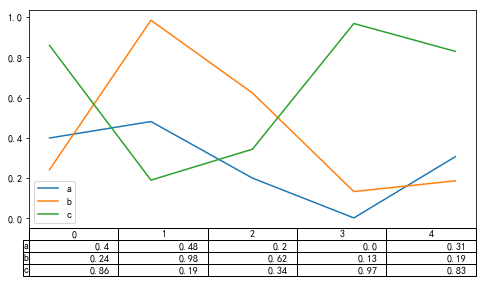

In [8]:
fig, ax = plt.subplots(1, 1)
df = pd.DataFrame(np.random.rand(5, 3), columns=['a', 'b', 'c'])
ax.get_xaxis().set_visible(False)  # 隐藏刻度
df.plot(table=np.round(df.T, 2), ax=ax)
plt.show()

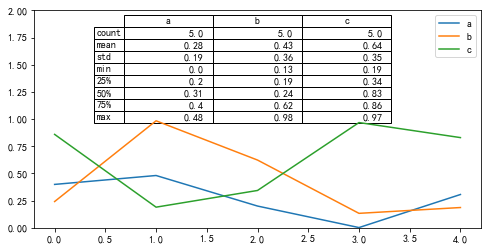

In [9]:
from pandas.plotting import table

fig, ax = plt.subplots(1,1)
table(ax, np.round(df.describe(), 2),
     loc='upper center',
     colWidths=[0.2, 0.2, 0.2])
df.plot(ax=ax, ylim=(0, 2), legend='best')
plt.show()